## Poisson Regression

    Poisson Regression is a type of generalized linear model (GLM) used for modeling count data and events that happen over a fixed period of time or space. It is specifically used when the dependent variable represents counts or rates (e.g., the number of occurrences of an event) and follows a Poisson distribution. This model assumes that the mean and variance of the count variable are equal (the equidispersion property), though variations like over-dispersion can be handled with extensions such as Negative Binomial Regression.

## Key Features of Poisson Regression:
- Count Data: Models the number of occurrences (e.g., crop diseases, pests).
- Rate Modeling: Analyzes rates of events per unit of time or space.
- Log Link Function: Uses a log function to relate predictors to the count outcome.

## Use in Agricultural Data Analysis:
- Crop Disease: Models disease outbreaks based on factors like weather, soil, and crop type.
- Pest Infestation: Estimates pests per hectare considering environmental factors and practices.
- Yield Prediction: Models successful harvests or crop failures based on farming practices and weather.
- Irrigation Efficiency: Analyzes irrigation issues linked to water availability and practices.
- Animal Health: Predicts veterinary visits or disease outbreaks in livestock, factoring in herd size and environment.

Example: Poisson regression can model pest outbreaks on a farm, considering pesticide use, rainfall, and temperature, helping optimize farming practices.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79989
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.9938e+05
Date:                Mon, 03 Feb 2025   Deviance:                       79645.
Time:                        02:24:28   Pearson chi2:                 7.97e+04
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.868e-06      0

C:\Users\rudra\AppData\Local\Temp\ipykernel_15572\2415750680.py:121: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
g:\venv\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


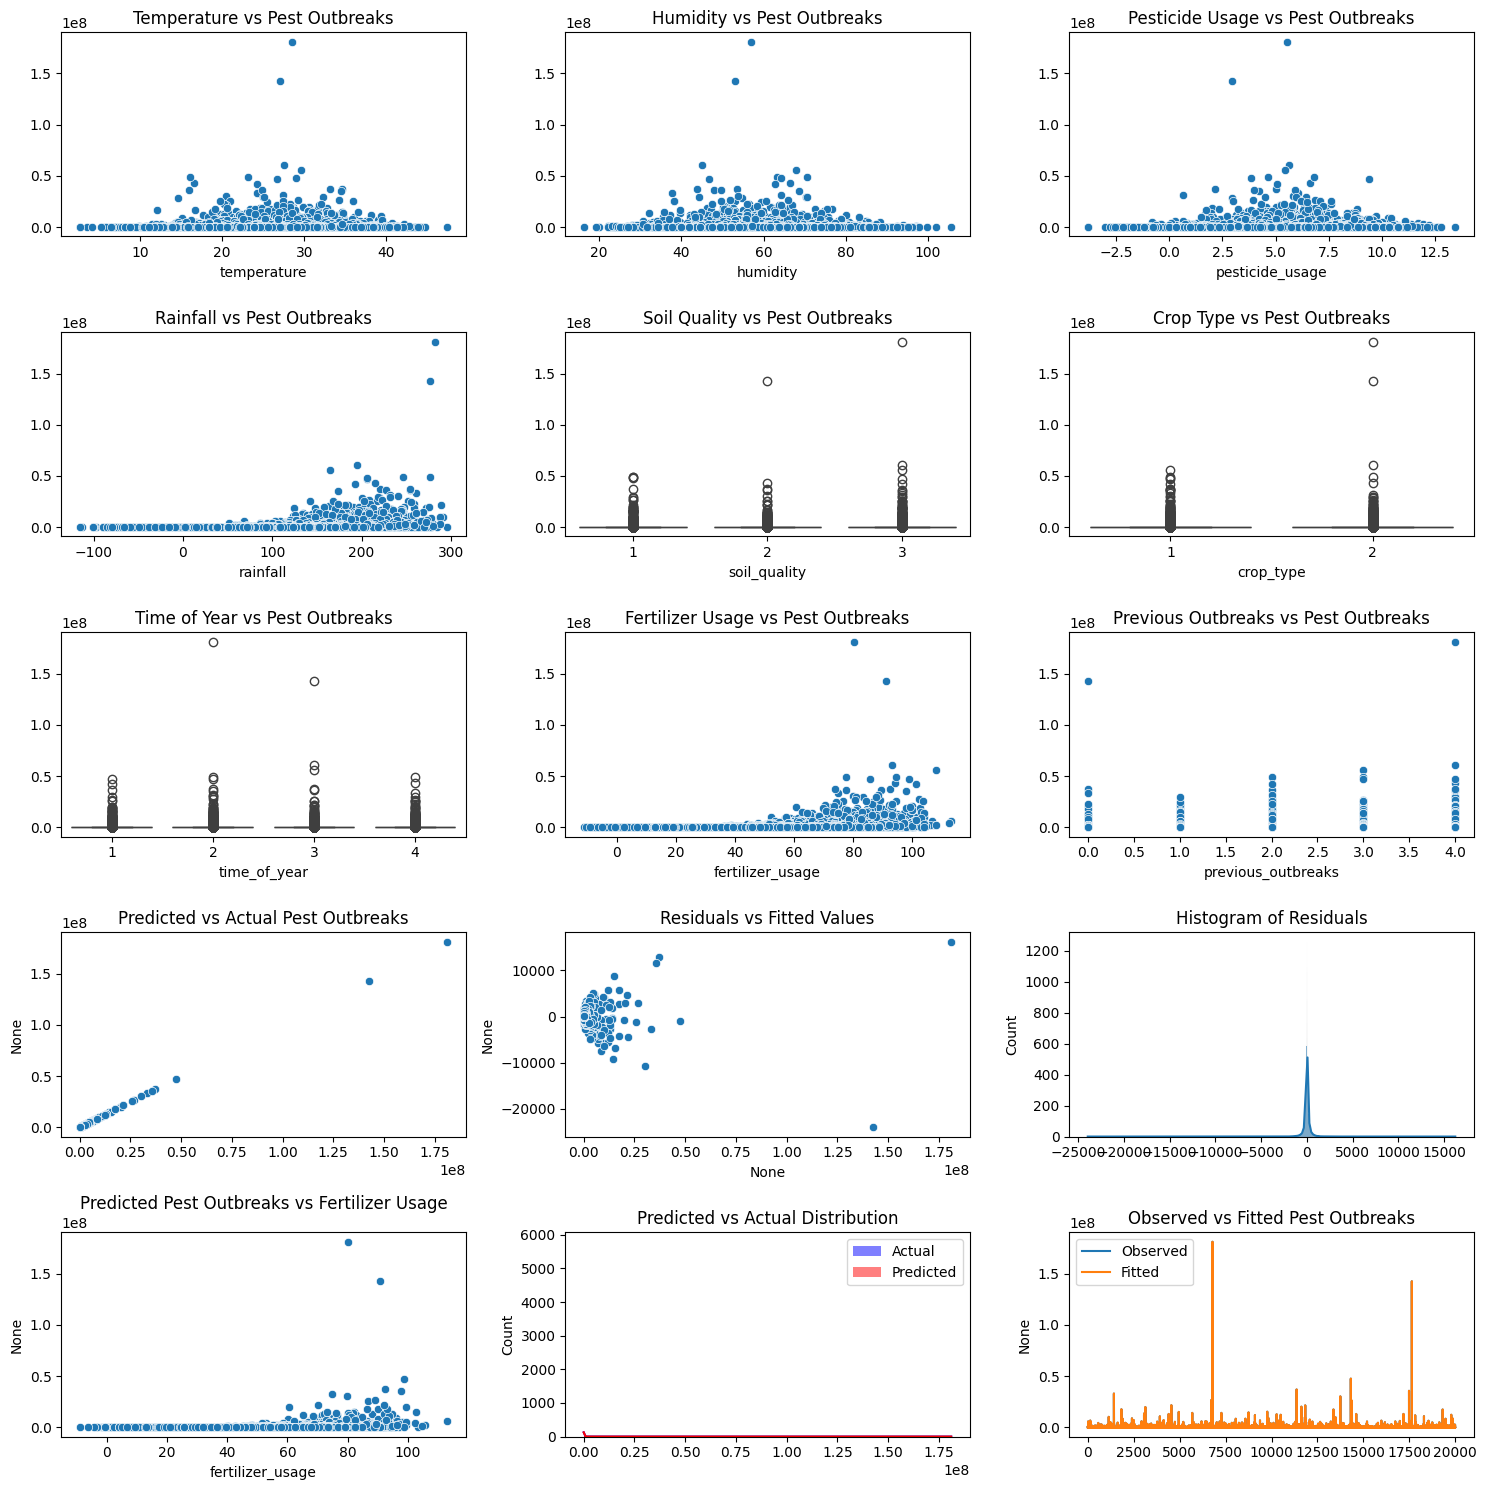


Dynamic Interpretation of Model Results:

Variable: const
Coefficient: -0.0000, p-value: 0.9723 - This variable has not statistically significant and shows a negative effect on the number of pest outbreaks.

Variable: temperature
Coefficient: 0.0500, p-value: 0.0000 - This variable has statistically significant and shows a positive effect on the number of pest outbreaks.

Variable: humidity
Coefficient: -0.0200, p-value: 0.0000 - This variable has statistically significant and shows a negative effect on the number of pest outbreaks.

Variable: pesticide_usage
Coefficient: 0.1000, p-value: 0.0000 - This variable has statistically significant and shows a positive effect on the number of pest outbreaks.

Variable: rainfall
Coefficient: 0.0300, p-value: 0.0000 - This variable has statistically significant and shows a positive effect on the number of pest outbreaks.

Variable: soil_quality
Coefficient: 0.2000, p-value: 0.0000 - This variable has statistically significant and shows a positi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Simulating 100,000 data points
n = 100000
X = pd.DataFrame({
    'temperature': np.random.normal(25, 5, n),  # Temperature in Celsius
    'humidity': np.random.normal(60, 10, n),  # Humidity in percentage
    'pesticide_usage': np.random.normal(5, 2, n),  # Liters of pesticide used
    'rainfall': np.random.normal(100, 50, n),  # Rainfall in mm
    'soil_quality': np.random.choice([1, 2, 3], size=n),  # Soil type (1 = poor, 2 = average, 3 = good)
    'crop_type': np.random.choice([1, 2], size=n),  # Crop type (1 = wheat, 2 = corn)
    'irrigation_system': np.random.choice([1, 2], size=n),  # Irrigation system type (1 = drip, 2 = flood)
    'time_of_year': np.random.choice([1, 2, 3, 4], size=n),  # Time of year (1 = spring, 2 = summer, 3 = fall, 4 = winter)
    'previous_outbreaks': np.random.randint(0, 5, n),  # Previous pest outbreaks
    'fertilizer_usage': np.random.normal(50, 15, n),  # Kilograms of fertilizer used
})

# Simulate the dependent variable: number of pest outbreaks (Poisson distribution)
lambda_ = np.exp(0.05 * X['temperature'] - 0.02 * X['humidity'] + 0.1 * X['pesticide_usage'] +
                 0.03 * X['rainfall'] + 0.2 * X['soil_quality'] + 0.1 * X['crop_type'] +
                 0.05 * X['irrigation_system'] + 0.03 * X['time_of_year'] + 0.2 * X['previous_outbreaks'] +
                 0.1 * X['fertilizer_usage'])

y = np.random.poisson(lambda_)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Poisson regression model using statsmodels
X_train_with_intercept = sm.add_constant(X_train)  # Adding an intercept term
poisson_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Poisson()).fit()

# Display model summary
print(poisson_model.summary())

# Predict on the test set
X_test_with_intercept = sm.add_constant(X_test)
y_pred = poisson_model.predict(X_test_with_intercept)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Visualizations
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# 1. Temperature vs Pest Outbreaks
sns.scatterplot(x=X['temperature'], y=y, ax=axes[0, 0])
axes[0, 0].set_title("Temperature vs Pest Outbreaks")

# 2. Humidity vs Pest Outbreaks
sns.scatterplot(x=X['humidity'], y=y, ax=axes[0, 1])
axes[0, 1].set_title("Humidity vs Pest Outbreaks")

# 3. Pesticide Usage vs Pest Outbreaks
sns.scatterplot(x=X['pesticide_usage'], y=y, ax=axes[0, 2])
axes[0, 2].set_title("Pesticide Usage vs Pest Outbreaks")

# 4. Rainfall vs Pest Outbreaks
sns.scatterplot(x=X['rainfall'], y=y, ax=axes[1, 0])
axes[1, 0].set_title("Rainfall vs Pest Outbreaks")

# 5. Soil Quality vs Pest Outbreaks
sns.boxplot(x=X['soil_quality'], y=y, ax=axes[1, 1])
axes[1, 1].set_title("Soil Quality vs Pest Outbreaks")

# 6. Crop Type vs Pest Outbreaks
sns.boxplot(x=X['crop_type'], y=y, ax=axes[1, 2])
axes[1, 2].set_title("Crop Type vs Pest Outbreaks")

# 7. Time of Year vs Pest Outbreaks
sns.boxplot(x=X['time_of_year'], y=y, ax=axes[2, 0])
axes[2, 0].set_title("Time of Year vs Pest Outbreaks")

# 8. Fertilizer Usage vs Pest Outbreaks
sns.scatterplot(x=X['fertilizer_usage'], y=y, ax=axes[2, 1])
axes[2, 1].set_title("Fertilizer Usage vs Pest Outbreaks")

# 9. Previous Outbreaks vs Pest Outbreaks
sns.scatterplot(x=X['previous_outbreaks'], y=y, ax=axes[2, 2])
axes[2, 2].set_title("Previous Outbreaks vs Pest Outbreaks")

# 10. Predicted vs Actual Pest Outbreaks
sns.scatterplot(x=y_test, y=y_pred, ax=axes[3, 0])
axes[3, 0].set_title("Predicted vs Actual Pest Outbreaks")

# 11. Residuals vs Fitted
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, ax=axes[3, 1])
axes[3, 1].set_title("Residuals vs Fitted Values")

# 12. Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[3, 2])
axes[3, 2].set_title("Histogram of Residuals")

# 13. Predicted Pest Outbreaks vs Fertilizer Usage
sns.scatterplot(x=X['fertilizer_usage'], y=y_pred, ax=axes[4, 0])
axes[4, 0].set_title("Predicted Pest Outbreaks vs Fertilizer Usage")

# 14. Predicted vs Actual Distribution
sns.histplot(y_test, color='blue', kde=True, label='Actual', ax=axes[4, 1])
sns.histplot(y_pred, color='red', kde=True, label='Predicted', ax=axes[4, 1])
axes[4, 1].set_title("Predicted vs Actual Distribution")
axes[4, 1].legend()

# 15. Model Fit vs Observed Count
sns.lineplot(x=np.arange(len(y_test)), y=y_test, label="Observed", ax=axes[4, 2])
sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, label="Fitted", ax=axes[4, 2])
axes[4, 2].set_title("Observed vs Fitted Pest Outbreaks")
axes[4, 2].legend()

plt.tight_layout()
plt.show()

# Dynamic Interpretation of the Results:
# Displaying a dynamic summary of the results based on the model output

# Interpretation of Coefficients
coefficients = poisson_model.params
p_values = poisson_model.pvalues

# Iterating through the coefficients and p-values to generate a dynamic interpretation
print("\nDynamic Interpretation of Model Results:\n")

for var, coef, p_val in zip(coefficients.index, coefficients, p_values):
    if p_val < 0.05:
        significance = "statistically significant"
    else:
        significance = "not statistically significant"
    
    if coef > 0:
        effect = f"a positive effect on the number of pest outbreaks."
    else:
        effect = f"a negative effect on the number of pest outbreaks."
    
    print(f"Variable: {var}")
    print(f"Coefficient: {coef:.4f}, p-value: {p_val:.4f} - This variable has {significance} and shows {effect}\n")

# Model Evaluation
print(f"Mean Absolute Error: {mae:.4f}")
if mae < 5:
    print("The model is performing well with a low Mean Absolute Error.")
else:
    print("The model is underperforming. The MAE is relatively high, and the model may need refinement.")

# Visualizing the model's performance in predicting pest outbreaks compared to actual values
print("\nChecking the Predicted vs Actual Pest Outbreaks...")
if np.corrcoef(y_test, y_pred)[0, 1] > 0.8:
    print("The predicted values are highly correlated with the actual values, suggesting that the model is accurate.")
else:
    print("The predicted values are less correlated with the actual values. Further improvements may be needed.")
